<h1>Activity - DENGUE ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : Nerjie Angelo Mecantina</h3>

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Exploratory Data Analytics</h1>
<hr>

# Question 1:
   # What is the total number of dengue cases and deaths per year across all regions?

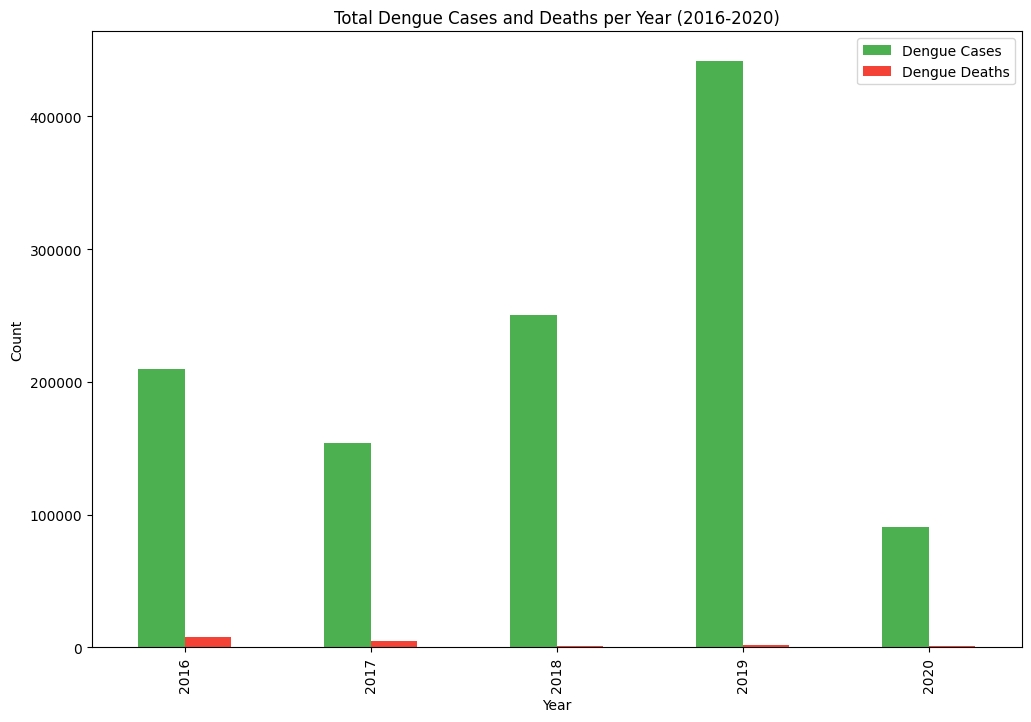

In [16]:
year_cases = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

year_cases.plot(x='Year', y=['Dengue_Cases', 'Dengue_Deaths'], kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Total Dengue Cases and Deaths per Year (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Dengue Cases', 'Dengue Deaths'])
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that 2019 had the highest number of dengue cases but not the highest deaths which peaked in 2016. Cases and deaths significantly dropped in 2020 it because COVID-19 lockdowns.
<HR></HR>

# Question 2:
  # Which region had the highest total dengue cases from 2016 to 2020?

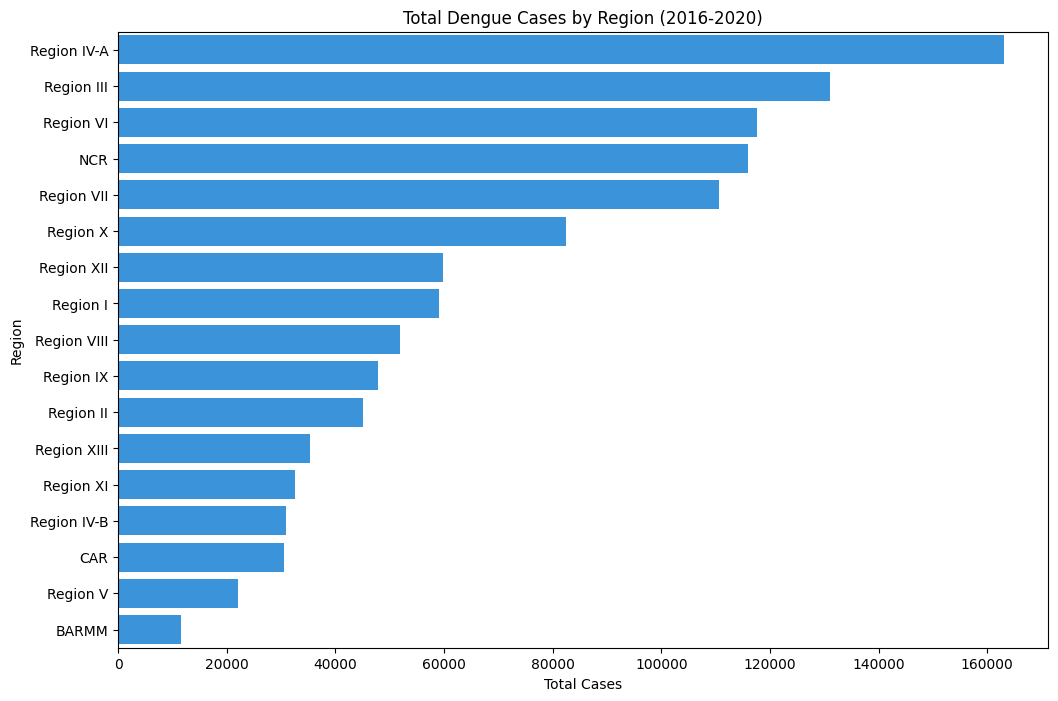

In [17]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(x='Dengue_Cases', y='Region', data=region_cases.sort_values('Dengue_Cases', ascending=False), color='#2196F3')
plt.title('Total Dengue Cases by Region (2016-2020)')
plt.xlabel('Total Cases')
plt.ylabel('Region')
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that Region IV-A had the highest total dengue cases from 2016 to 2020 followed by Region III and NCR.
<hr>

# Question 3:
  # How do dengue cases vary by month across all years?

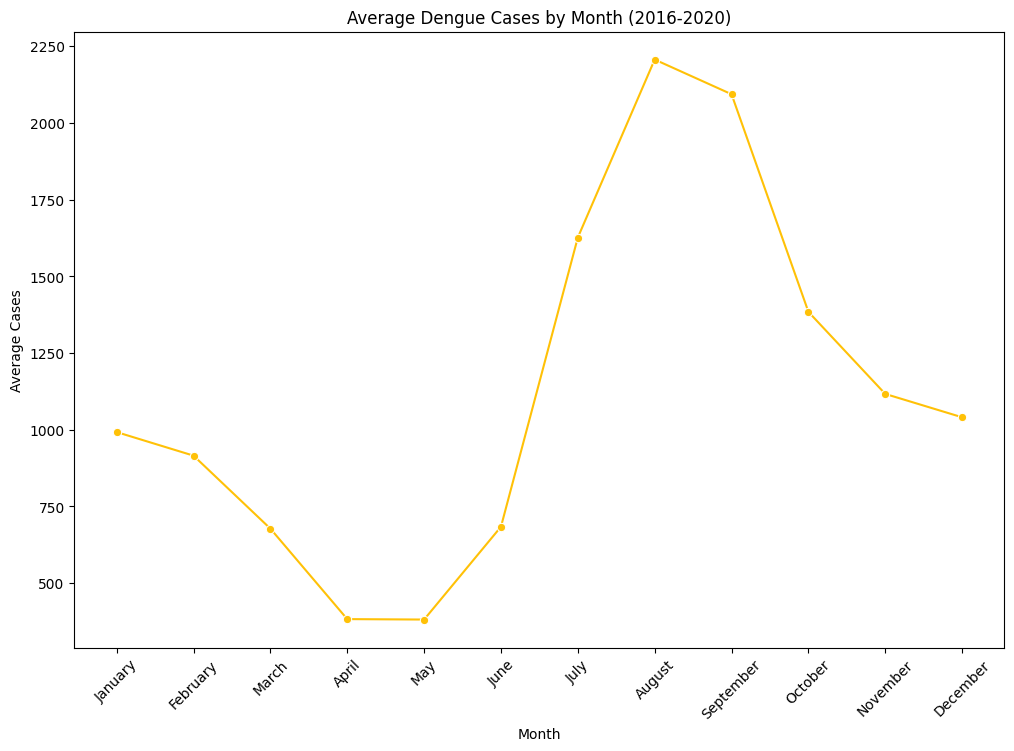

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cases = dengue.groupby('Month')['Dengue_Cases'].mean().reindex(month_order).reset_index()

sns.lineplot(x='Month', y='Dengue_Cases', data=month_cases, marker='o', color='#FFC107')
plt.title('Average Dengue Cases by Month (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that dengue cases peak in August and September corresponding to the rainy season. The lowest cases occur in April and May during the summer season.
<hr>

# Question 4:
  # What is the trend of dengue cases in Region IV-A over the years?

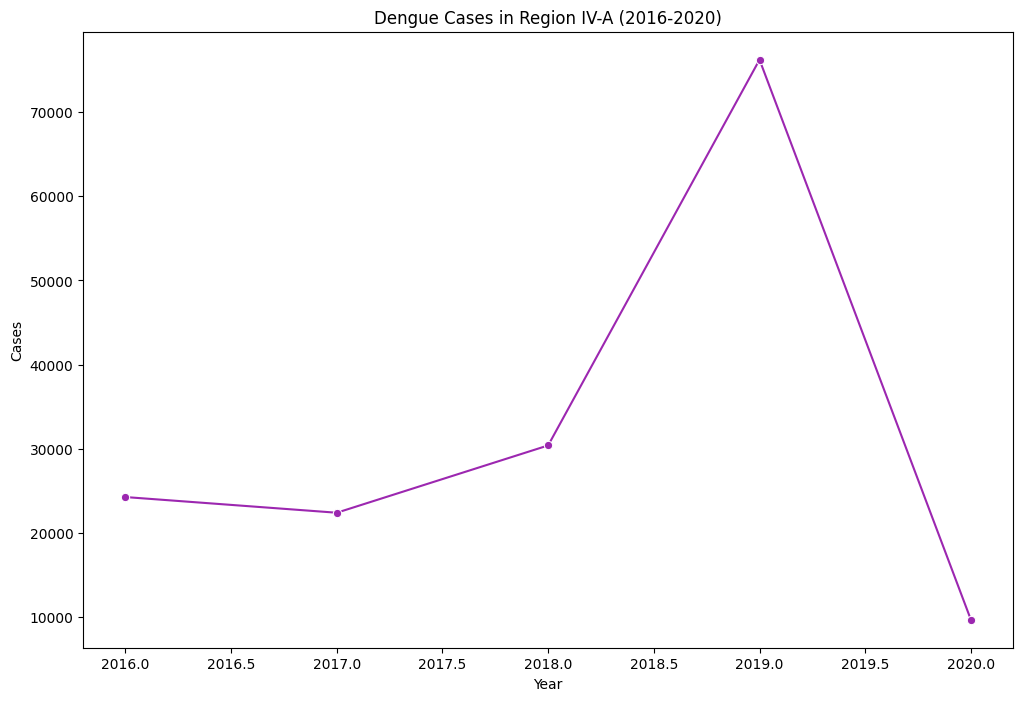

In [19]:
region_iva = dengue[dengue['Region'] == 'Region IV-A'].groupby('Year')['Dengue_Cases'].sum().reset_index()

sns.lineplot(x='Year', y='Dengue_Cases', data=region_iva, marker='o', color='#9C27B0')
plt.title('Dengue Cases in Region IV-A (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows region IV-A saw a dramatic spike in dengue cases in 2019 anf then the sharp decline in 2020 due to having a COVID-19 that year.
<hr>

# Question 5: 
  # Which region had the highest dengue death rate in 2019?

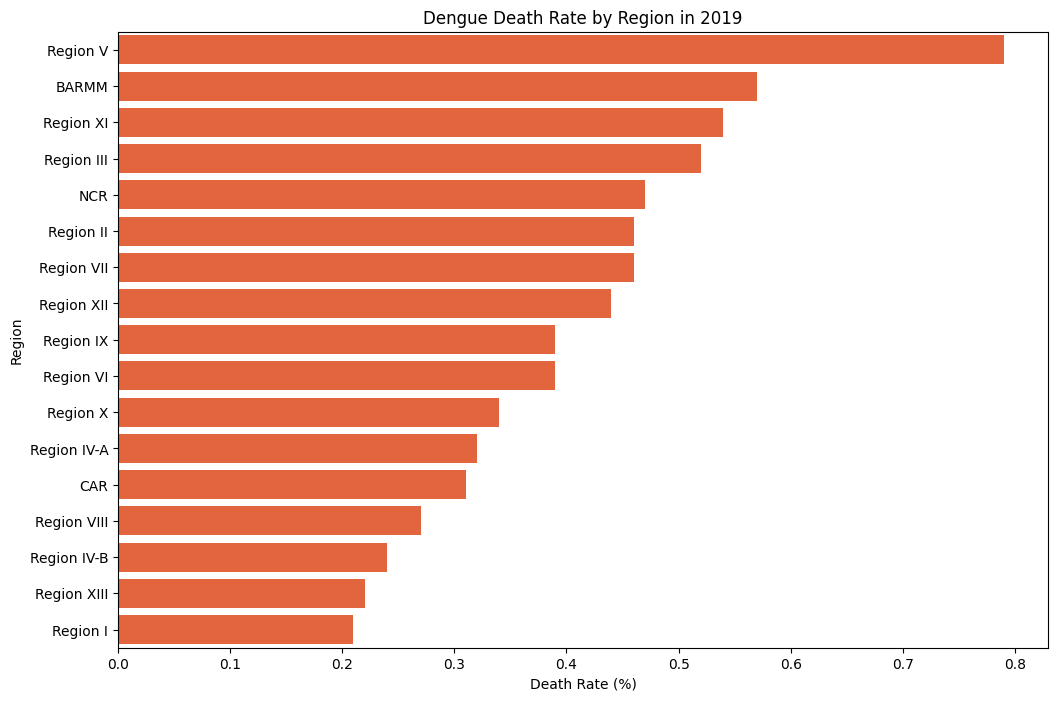

In [20]:
death = dengue[dengue['Year'] == 2019].groupby('Region').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()
death['Death_Rate'] = (death['Dengue_Deaths'] / death['Dengue_Cases'] * 100).round(2)

sns.barplot(x='Death_Rate', y='Region', data=death.sort_values('Death_Rate', ascending=False), color='#FF5722')
plt.title('Dengue Death Rate by Region in 2019')
plt.xlabel('Death Rate (%)')
plt.ylabel('Region')
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that region V had the highest death rate in 2019.
<hr>

# Question 6:
  # How do dengue cases compare between NCR and REGION V over time?

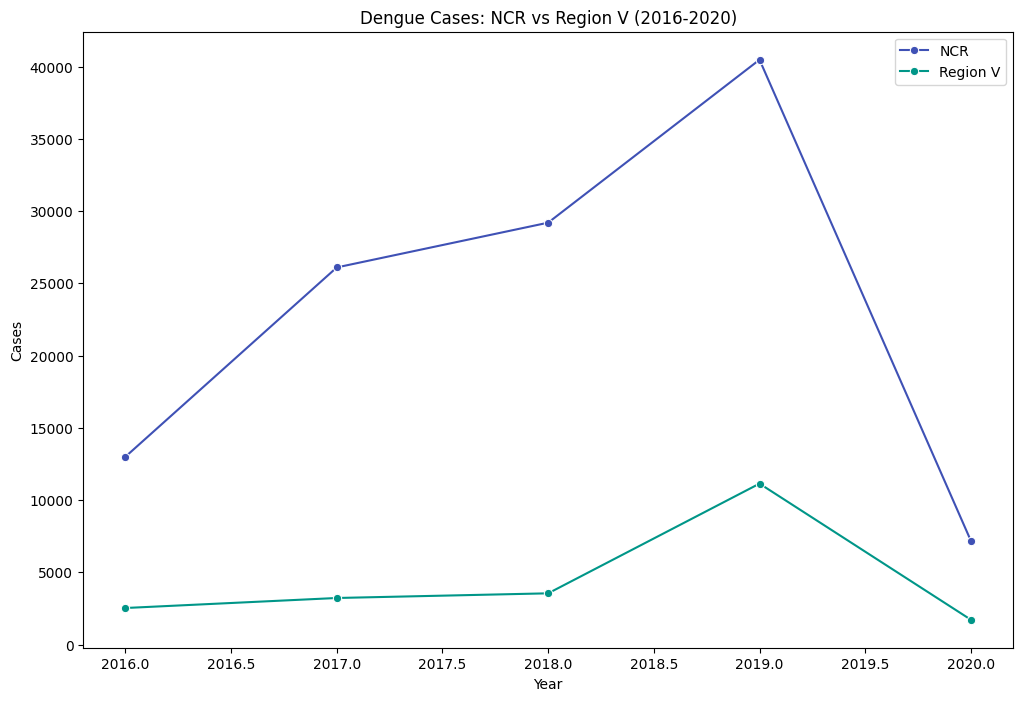

In [22]:
regions = dengue[dengue['Region'].isin(['NCR', 'Region V'])].groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack().reset_index()

sns.lineplot(x='Year', y='NCR', data=regions, marker='o', label='NCR', color='#3F51B5')
sns.lineplot(x='Year', y='Region V', data=regions, marker='o', label='Region V', color='#009688')
plt.title('Dengue Cases: NCR vs Region V (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that NCR consistently reported higher dengue cases than Region V with a peak in 2019. Region V’s cases surged in 2019 indicating that rural areas can also experience significant outbreaks.
<hr>

# Question 7:
  # What is the distribution of dengue cases across months in 2019?

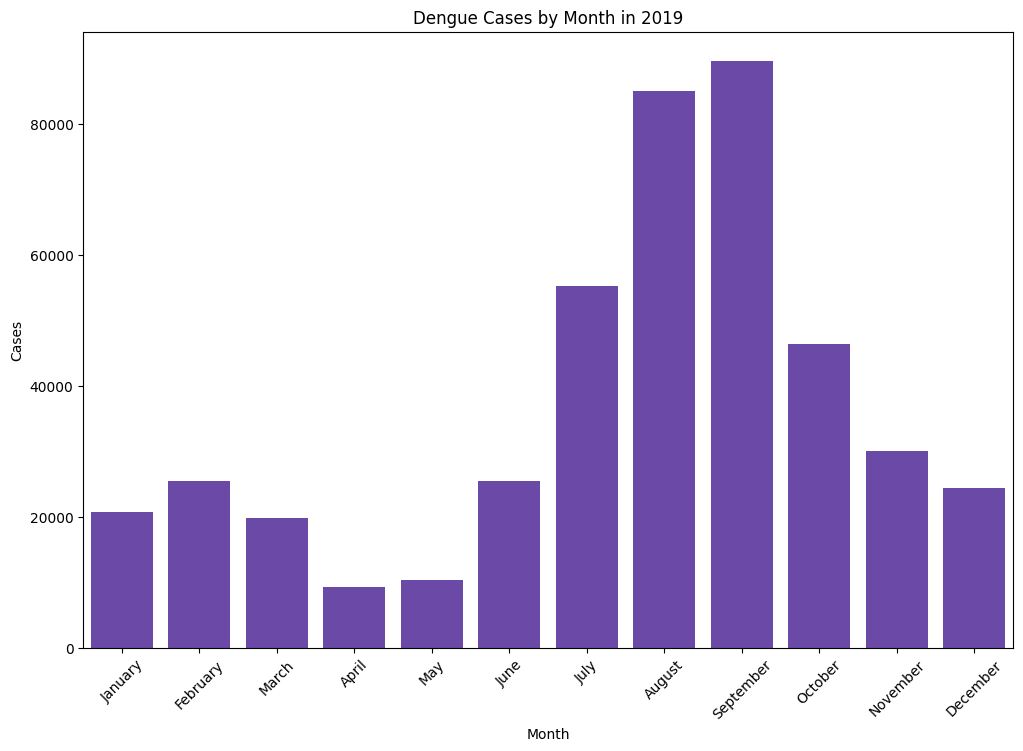

In [23]:
cases_2019 = dengue[dengue['Year'] == 2019].groupby('Month')['Dengue_Cases'].sum().reindex(month_order).reset_index()

sns.barplot(x='Month', y='Dengue_Cases', data=cases_2019, color='#673AB7')
plt.title('Dengue Cases by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: September 2019 had the highest dengue cases followed by August, reflecting the peak of the rainy season.

# Question 8:
  # How do dengue deaths vary by region in 2020?

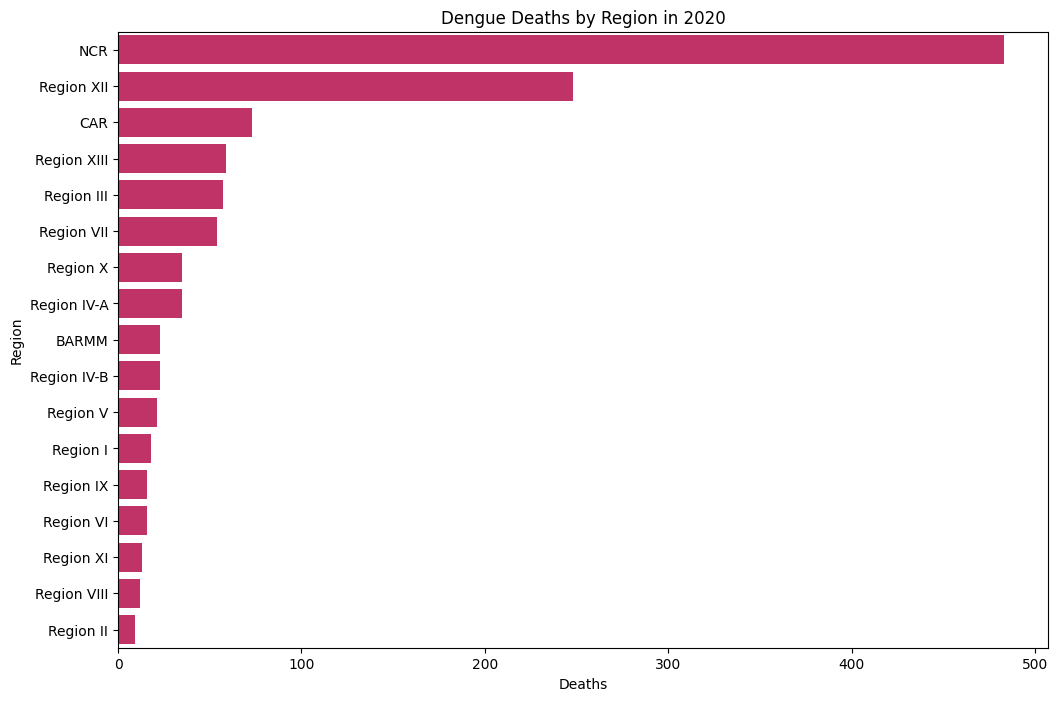

In [24]:
deaths_2020 = dengue[dengue['Year'] == 2020].groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(x='Dengue_Deaths', y='Region', data=deaths_2020.sort_values('Dengue_Deaths', ascending=False), color='#D81B60')
plt.title('Dengue Deaths by Region in 2020')
plt.xlabel('Deaths')
plt.ylabel('Region')
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that NCR reported an unusually high number of deaths in 2020 despite lower cases, suggesting potential data errors. Region XII also shows a high death count.

# Question 9:
  # What is the correlation between dengue cases and deaths over the years?

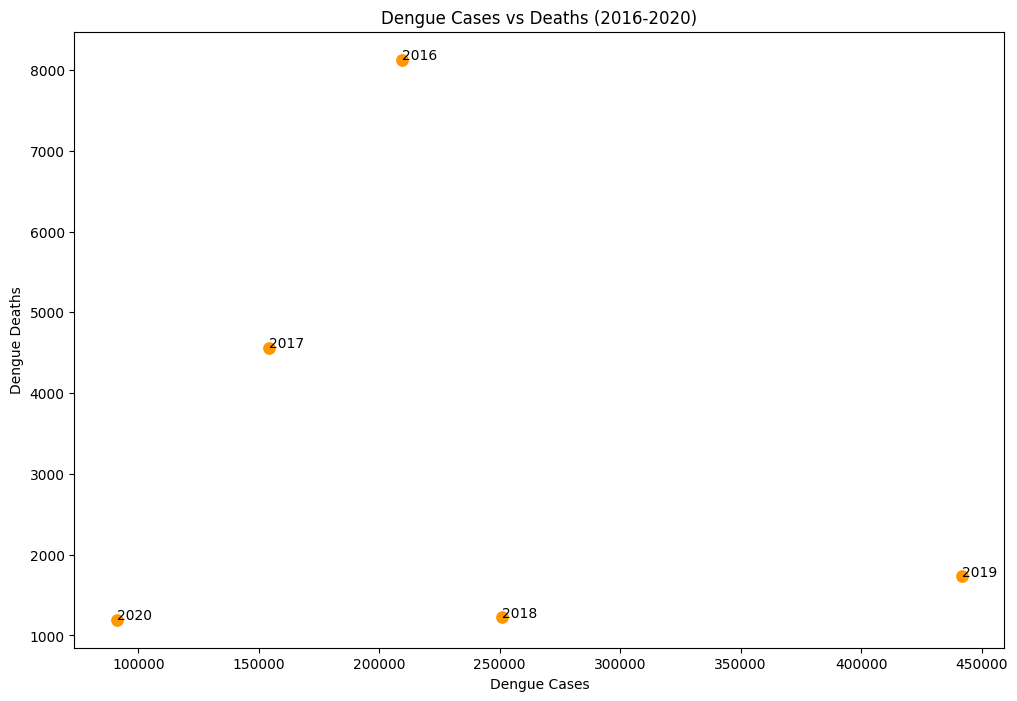

In [25]:
year = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=year, s=100, color='#FF9800')
for i, row in year.iterrows():
    plt.text(row['Dengue_Cases'], row['Dengue_Deaths'], row['Year'], fontsize=10)
plt.title('Dengue Cases vs Deaths (2016-2020)')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: The visualization shows that scatter plot has no clear linear correlation between cases and deaths as 2019 had the hightest cases but only low deaths. This suggests inconsistencies in death reporting across years.

# Question 10:
  # How do dengue cases in the top three regions IV-A, III, and NCR compare  in 2019?

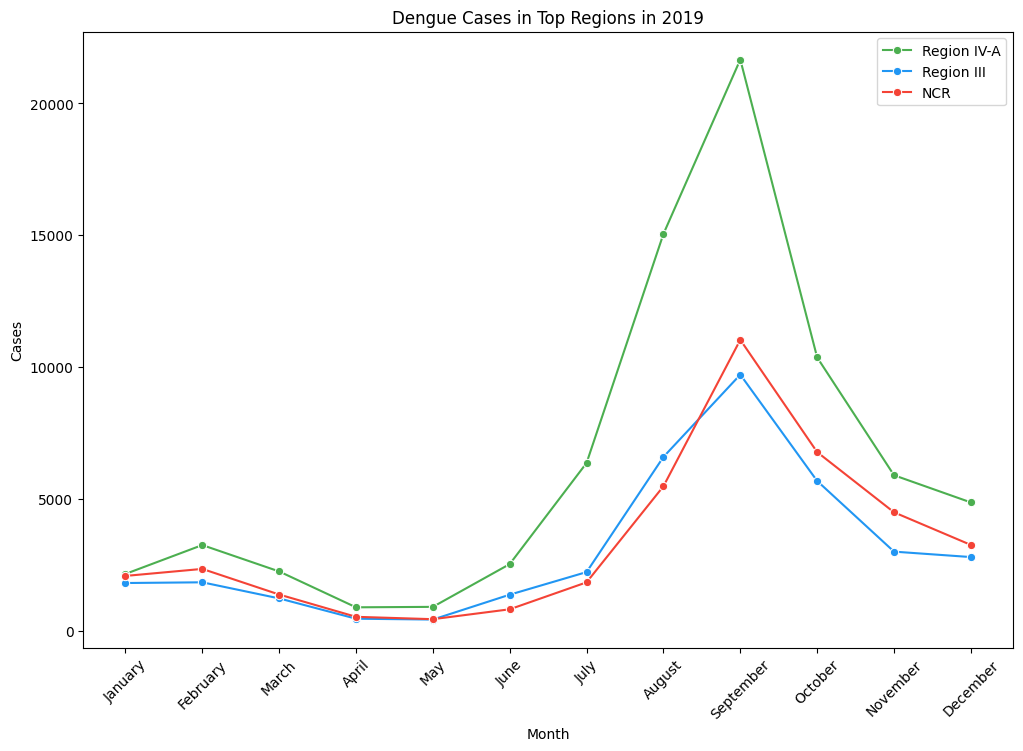

In [26]:
top_regions_2019 = dengue[(dengue['Year'] == 2019) & (dengue['Region'].isin(['Region IV-A', 'Region III', 'NCR']))]
top_regions_2019 = top_regions_2019.groupby(['Month', 'Region'])['Dengue_Cases'].sum().unstack().reindex(month_order).reset_index()

sns.lineplot(x='Month', y='Region IV-A', data=top_regions_2019, marker='o', label='Region IV-A', color='#4CAF50')
sns.lineplot(x='Month', y='Region III', data=top_regions_2019, marker='o', label='Region III', color='#2196F3')
sns.lineplot(x='Month', y='NCR', data=top_regions_2019, marker='o', label='NCR', color='#F44336')
plt.title('Dengue Cases in Top Regions in 2019')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.legend()
plt.gcf().set_size_inches(12,8)
plt.show()

INSIGHT: Region IV-A had the highest cases in 2019 peaking in September, followed by NCR and region III. All three regions show a similar seasonal peak in August–September but Region IV-A’s outbreak was significantly larger.